In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import TargetEncoder, OneHotEncoder, StandardScaler, Normalizer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from datetime import datetime

from sklearn.pipeline import Pipeline

from sklearn.metrics import make_scorer, balanced_accuracy_score, classification_report, confusion_matrix, precision_recall_curve, accuracy_score, f1_score, roc_auc_score, roc_curve


from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE



Initial Modification
goal
country
deadline
created_at
launched_at
staff_pick
backers_count
static_usd_rate
usd_pledged
category
deadline_month
deadline_day
deadline_yr
deadline_hr
created_at_month
created_at_day
created_at_yr
created_at_hr
launched_at_month
launched_at_day
launched_at_yr
launched_at_hr
create_to_launch
launch_to_deadline
launch_to_state_change
SuccessfulBool
TOPCOUNTRY
LaunchedTuesday
DeadlineWeekend
goal                         0
country                      0
deadline                     0
created_at                   0
launched_at                  0
staff_pick                   0
backers_count                0
static_usd_rate              0
usd_pledged                  0
category                  1889
deadline_month               0
deadline_day                 0
deadline_yr                  0
deadline_hr                  0
created_at_month             0
created_at_day               0
created_at_yr                0
created_at_hr                0
launched_at_month   

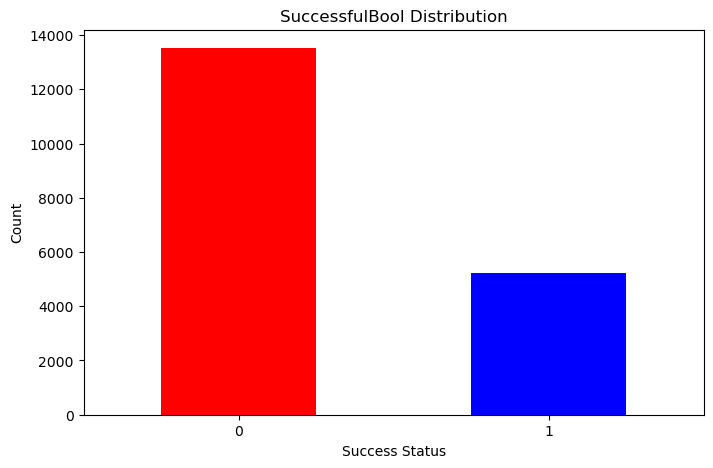


Country:
 country
US    12805
GB     2311
CA      976
AU      620
DE      328
NL      294
FR      293
IT      222
ES      156
DK      118
NZ       97
CH       89
SE       88
IE       77
NO       60
AT       58
MX       53
BE       45
HK       30
SG       21
LU        2
Name: count, dtype: int64


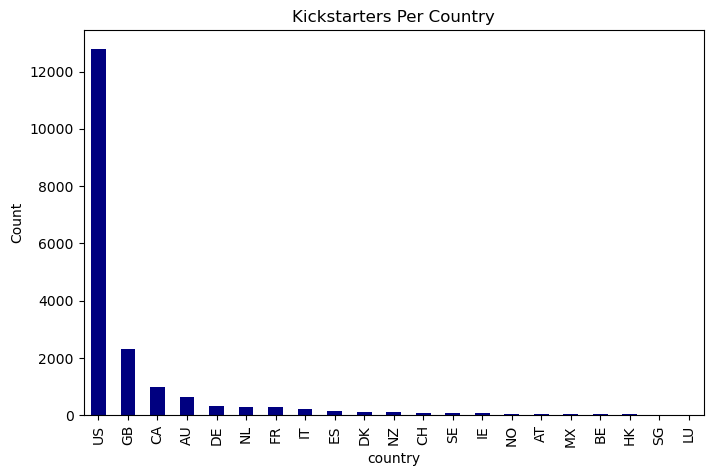


Category:
 category
Web             3325
Hardware        3248
Software        2631
Gadgets         2336
Plays           1184
Apps            1168
Wearables        971
Musical          791
Sound            528
Festivals        482
Robots           473
Flight           373
Experimental     321
Immersive        277
Makerspaces      203
Spaces           182
Places           100
Shorts            40
Thrillers         20
Webseries         20
Restaurants       20
Blues             20
Academic          20
Comedy            10
Name: count, dtype: int64


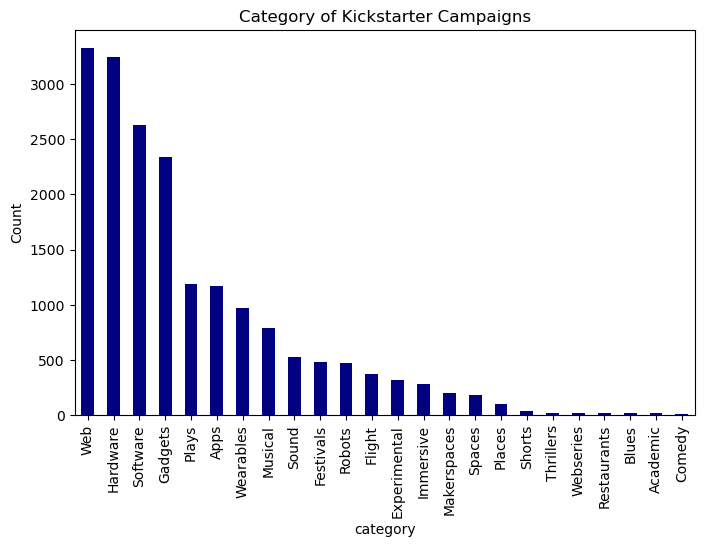


After MULT
               goal country  deadline  created_at  launched_at  staff_pick  \
0       1500.000000      US       635        1375          827           0   
1        500.000000      US       973         568          973           0   
2     100000.000000      US       497           8          497           0   
3       5000.000000      US        41        1350           41           0   
4       3591.284600      DE       720         849          357           0   
...             ...     ...       ...         ...          ...         ...   
2369    4289.404400      AU      1202        1082         1202           0   
2370    4282.163750      GB        85         580           85           0   
2371    1530.816870      GB       764         625          764           0   
2372    2524.729725      GB       360        1067         1071           0   
2373    1200.000000      US      1380        1149          762           0   

      backers_count  usd_pledged  category  deadlin

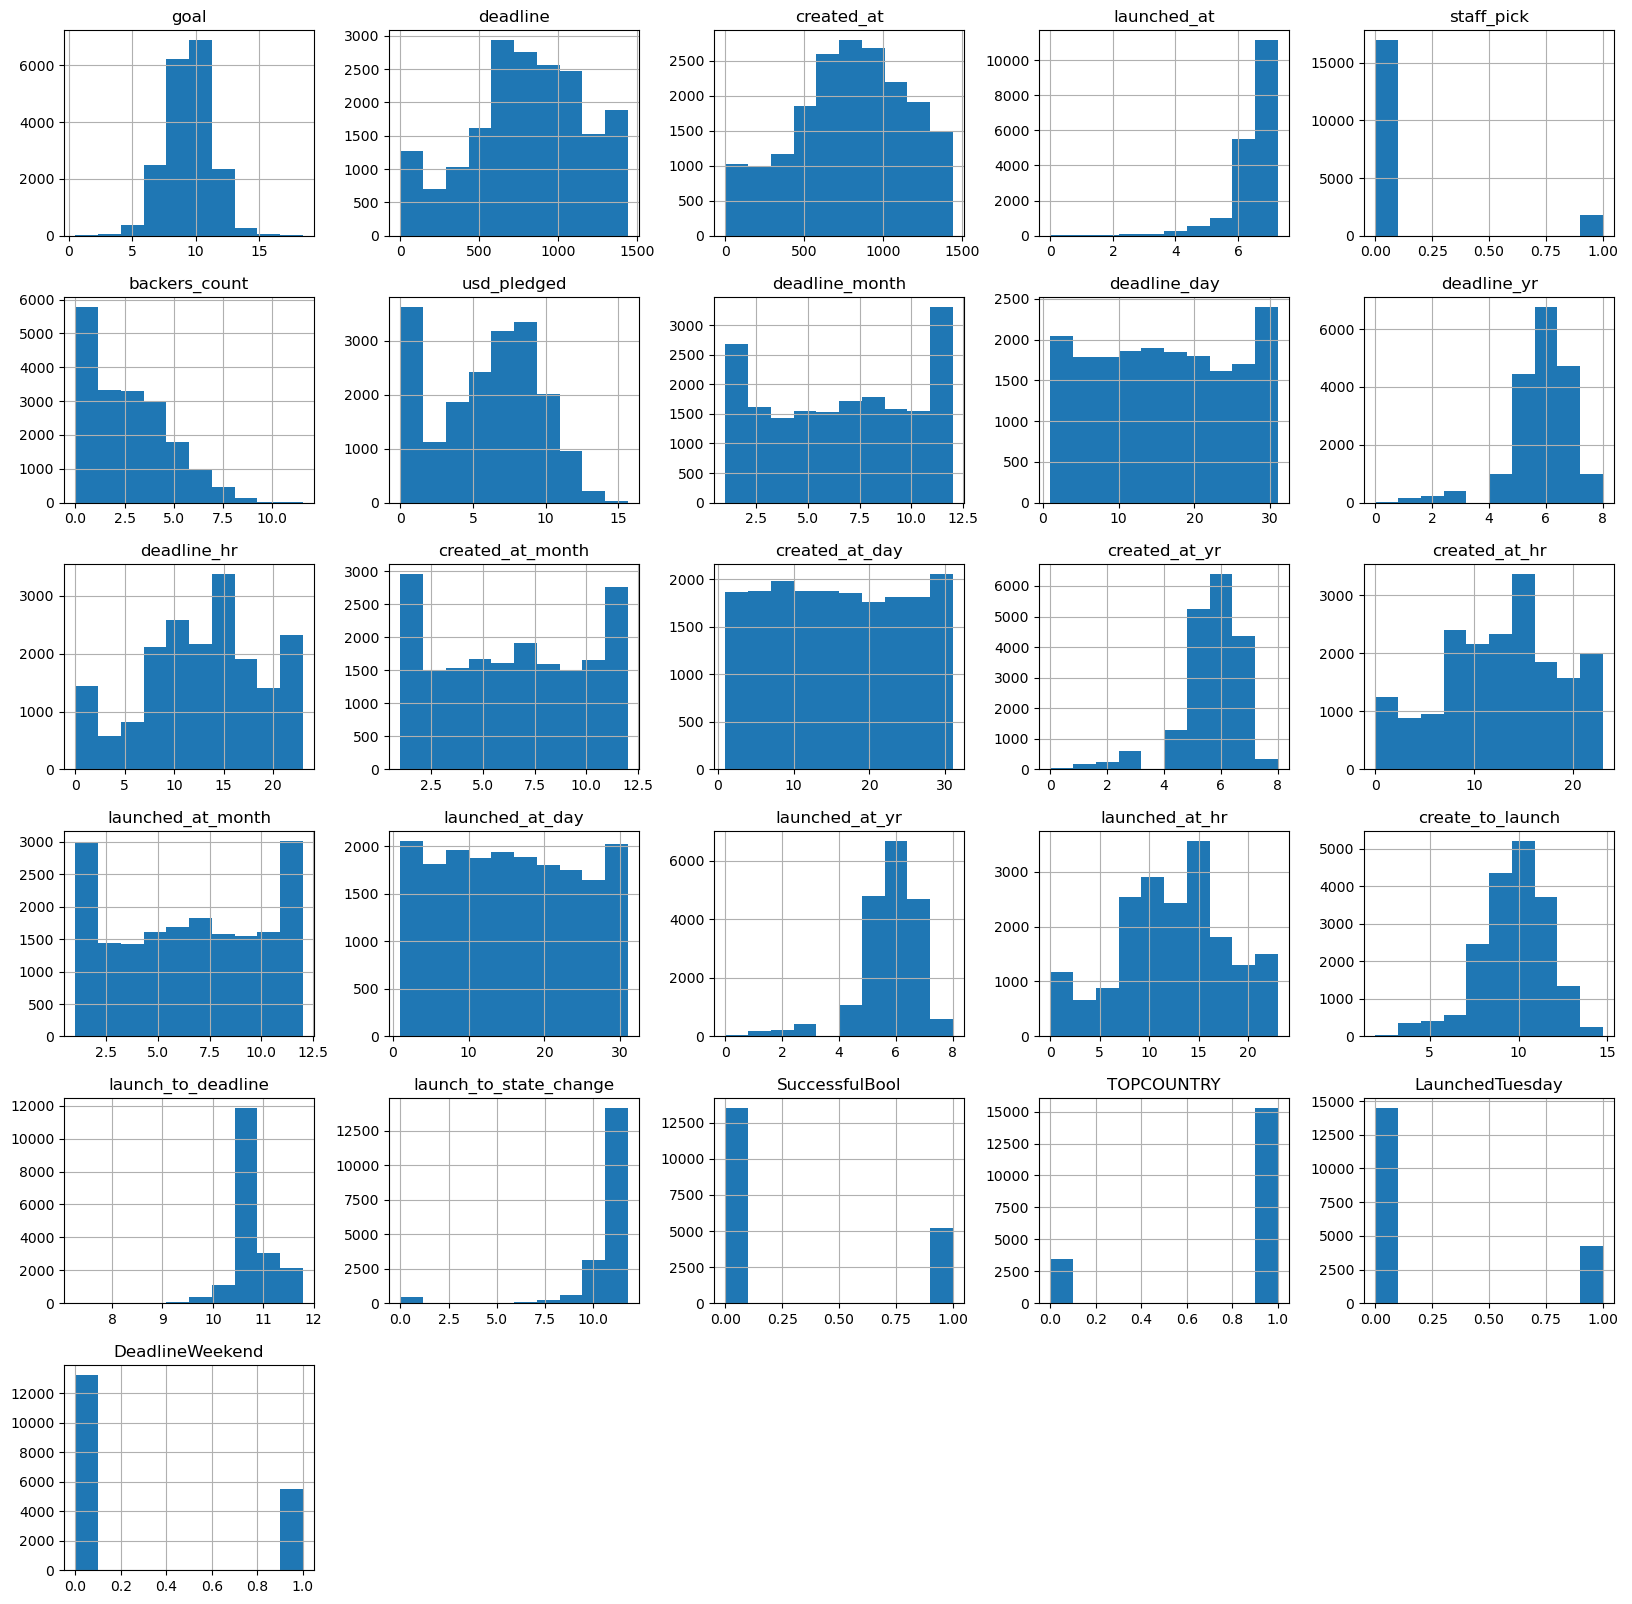


Histograms for Goal, Create To Launch, and Launch To Deadline:



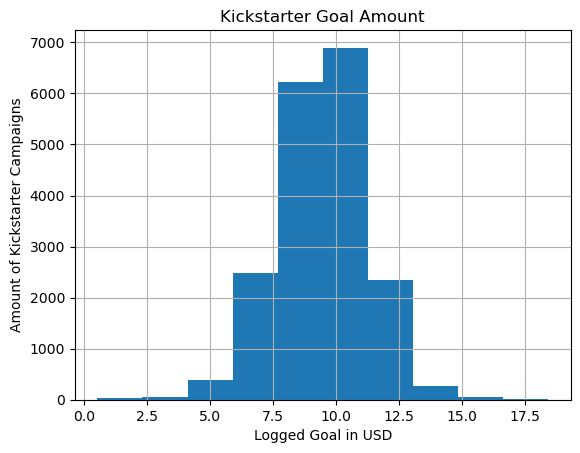

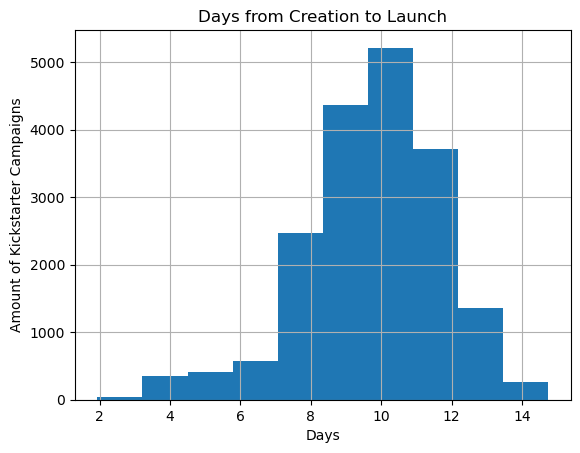

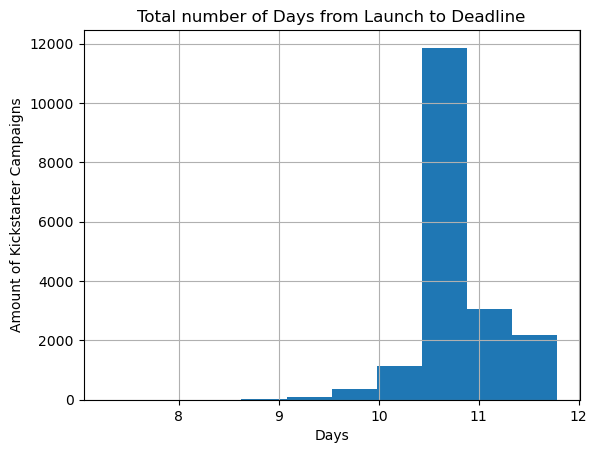

            goal country  deadline  created_at  launched_at  staff_pick  \
0       7.313887      US       635        1375     6.719013           0   
1       6.216606      US       973         568     6.881411           0   
2      11.512935      US       497           8     6.210600           0   
3       8.517393      US        41        1350     3.737670           0   
4       8.186544      DE       720         849     5.880533           0   
...          ...     ...       ...         ...          ...         ...   
20627  10.389729      CH      1019         224     6.939254           0   
20628  11.566283      DE       701         556     6.553933           0   
20629   9.210440      US       728         731     6.591674           0   
20630   7.824446      US       816        1226     6.705639           0   
20631  11.064027      IE       264         342     5.579730           0   

       backers_count  category  deadline_month  deadline_day  ...  \
0           0.000000  Academic

In [ ]:
# Load the dataset
data = pd.read_csv("kickstarter_data_full.csv", low_memory=False)

print("\nInitial Modification")
data1 = data.drop(columns=[data.columns[0], 'disable_communication','id','photo', 'name','spotlight','staff_pick','blurb', 'state','USorGB', 'pledged', 'slug', 'currency','currency_symbol', 
'currency_trailing_code', 'state_changed_at', 'creator', 'location', 'profile', 'urls', 'source_url', 'friends', 'is_starred', 'is_backing', 'permissions',
'deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday','blurb_len', 'blurb_len_clean', 'name_len', 'name_len_clean','launched_at_weekday','create_to_launch_days', 'launch_to_deadline_days',
'launch_to_state_change_days', 'spotlight','state_changed_at_weekday','state_changed_at_month','state_changed_at_day','state_changed_at_yr'
,'state_changed_at_hr'], axis = 1)

for col in data1:
    print(col)

print(data1.isnull().sum())
data1 = data1.dropna()
print(data1.isnull().sum())

bool_cols = [ 'SuccessfulBool', 'LaunchedTuesday', 'DeadlineWeekend', 'TOPCOUNTRY']
data1[bool_cols] = data1[bool_cols].astype(int)

def to_minutes(x):
    if isinstance(x, str):
        parts = x.split()
        days = int(parts[0]) if 'days' in x else 0
        time_str = parts[-1]
        h, m, s = time_str.split(':')
        return days * 1440 + int(h) * 60 + int(m) + float(s.split('.')[0]) / 60
    return x

def datetime_to_minutes(x):
    if isinstance(x, str):
        try:
            dt = datetime.strptime(x, "%m/%d/%Y %H:%M")
            return dt.hour * 60 + dt.minute 
        except ValueError:
            return x 
    return x

data1['create_to_launch'] = data1['create_to_launch'].apply(to_minutes)
data1['launch_to_deadline'] = data1['launch_to_deadline'].apply(to_minutes)
data1['launch_to_state_change'] = data1['launch_to_state_change'].apply(to_minutes)

data1['launched_at'] = data1['launched_at'].apply(datetime_to_minutes)
data1['created_at'] = data1['created_at'].apply(datetime_to_minutes)
data1['deadline'] = data1['deadline'].apply(datetime_to_minutes)


print("\nSuccessfulBool distribution:\n", data1['SuccessfulBool'].value_counts())
plt.figure(figsize=(8, 5))
data1['SuccessfulBool'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('SuccessfulBool Distribution')
plt.xlabel('Success Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


print("\nCountry:\n", data1['country'].value_counts())
plt.figure(figsize=(8, 5))
data1['country'].value_counts().plot(kind='bar', color=['navy'])
plt.title('Kickstarters Per Country')
plt.ylabel('Count')
plt.show()


print("\nCategory:\n", data1['category'].value_counts())
plt.figure(figsize=(8, 5))
data1['category'].value_counts().plot(kind='bar', color=['navy'])
plt.title('Category of Kickstarter Campaigns')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()


data1['goal'] = data1['goal'] * data1['static_usd_rate']
data1 = data1.drop(columns='static_usd_rate', axis=1)

print("\nAfter MULT")
print(data1.head(1999))

for col in ['goal','create_to_launch', 'launch_to_deadline','launch_to_state_change','usd_pledged','launched_at','backers_count']:
    data1[col] = np.log1p(data1[col])

print("\nAfter LOG")
print(data1.head(1999))

for yr in ['deadline_yr', 'created_at_yr', 'launched_at_yr']:
    data1[yr] = data1[yr] - 2009

print("\nAfter SUB\n")
print(data1.head(1999))


print(f"\nHistogram Set:\n")
data1.hist(figsize=(20, 20))
plt.show()

print(f"\nHistograms for Goal, Create To Launch, and Launch To Deadline:\n")
data1['goal'].hist()
plt.title('Kickstarter Goal Amount')
plt.ylabel('Amount of Kickstarter Campaigns')
plt.xlabel('Logged Goal in USD')
plt.xticks(rotation=0)  
plt.show()

data1['create_to_launch'].hist()
plt.title('Days from Creation to Launch')
plt.ylabel('Amount of Kickstarter Campaigns')
plt.xlabel('Days')
plt.xticks(rotation=0) 
plt.show()

data1['launch_to_deadline'].hist()
plt.title('Total number of Days from Launch to Deadline')
plt.ylabel('Amount of Kickstarter Campaigns')
plt.xlabel('Days')
plt.xticks(rotation=0)  
plt.show()


X1 = data1.drop(columns=['SuccessfulBool','usd_pledged'], axis = 1)
Y1 = data1['SuccessfulBool']
Y = Y1.values
X = X1.values
print(X1)
print(Y1)
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42, stratify=Y1)

Accuracy: 0.9215790877567351

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      2705
           1       0.81      0.94      0.87      1044

    accuracy                           0.92      3749
   macro avg       0.89      0.93      0.91      3749
weighted avg       0.93      0.92      0.92      3749


Confusion Matrix:
 [[2469  236]
 [  58  986]]
ROC-AUC: 0.9748263114283893
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2705
           1       0.82      0.91      0.87      1044

    accuracy                           0.92      3749
   macro avg       0.89      0.92      0.91      3749
weighted avg       0.93      0.92      0.92      3749

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


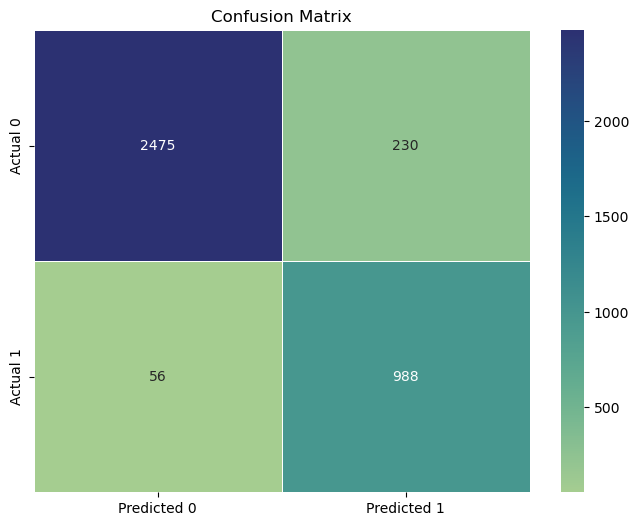

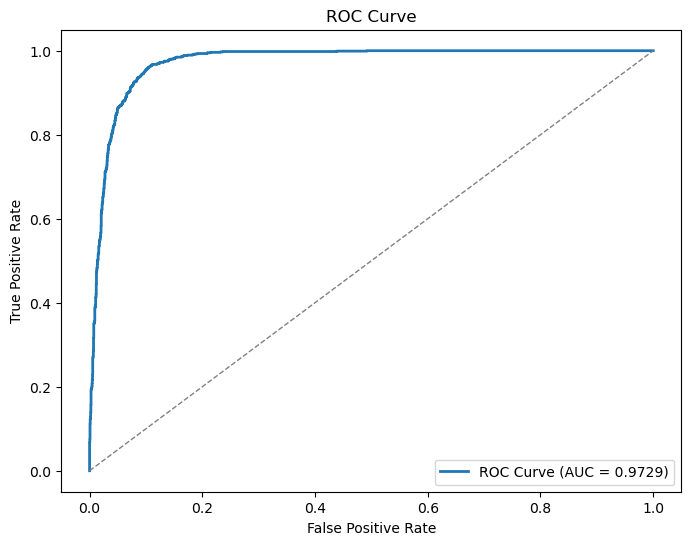

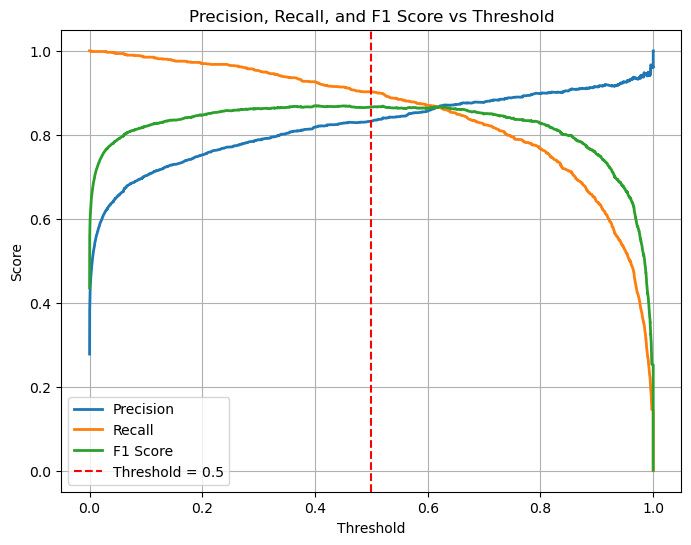

In [ ]:


encoder1 = TargetEncoder()
encoder2 = TargetEncoder()
X_train['country'] = encoder1.fit_transform(X_train[['country']], Y_train)
X_train['category'] = encoder2.fit_transform(X_train[['category']], Y_train)
X_test['country'] = encoder1.transform(X_test[['country']])
X_test['category'] = encoder2.transform(X_test[['category']])


numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop(['country', 'category'], errors='ignore')

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

svm = SVC(
    kernel='rbf', 
    class_weight='balanced',  
    random_state=42,
    probability=True  
)


svm.fit(X_train, Y_train)


y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))


if len(Y_train.unique()) == 2:
    y_proba = svm.predict_proba(X_test)[:, 1]
    print("ROC-AUC:", roc_auc_score(Y_test, y_proba))
    

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)


svm.fit(X_train_resampled, y_train_resampled)
y_pred_smote = svm.predict(X_test)
print(classification_report(Y_test, y_pred_smote))

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_
y_pred_tuned = best_svm.predict(X_test)

print("Tuned SVM Train Accuracy:", best_svm.score(X_train_rfe, Y_train))
print("Tuned SVM Test Accuracy:", best_svm.score(X_test_rfe, Y_test))


cm = confusion_matrix(Y_test, y_pred_tuned)
cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='crest', linewidths=0.5)
plt.title("Confusion Matrix")
plt.show()


y_test_proba = svm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_test_proba)
roc_auc = roc_auc_score(Y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", linewidth=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


precisions, recalls, pr_thresholds = precision_recall_curve(Y_test, y_test_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

plt.figure(figsize=(8, 6))
plt.plot(pr_thresholds, precisions[:-1], label="Precision", linewidth=2)
plt.plot(pr_thresholds, recalls[:-1], label="Recall", linewidth=2)
plt.plot(pr_thresholds, f1_scores[:-1], label="F1 Score", linewidth=2)
plt.axvline(x=0.5, color='red', linestyle='--', label="Threshold = 0.5")
plt.title("Precision, Recall, and F1 Score vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()
